In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wmap_camb_example

import corner

In [21]:
variable_names = ['H_0', 'w_b h^2', 'w_c h^2', 'tau', 'A_s', 'slope']

def printVals(chain):
    pars_new=np.mean(chain[20:,:], axis=0)
    std_new=np.std(chain[20:,:], axis=0)
# print("Resulting values: ", pars_new, "with std", std_new )
    
    for i, e in enumerate(pars_new):
        print("{}: {:.4}, std: {:.4}".format(variable_names[i], e, std_new[i]))

### 4) 
Now write a Markov-chain Monte Carlo where you fit the basic 6 parameters, including τ. However, note that we know the optical depth can’t be negative, so you should reject any steps that try to sample a negative τ. What are your parameter limits now? Please also present an argument as to why you think your chains are converged. As a reminder, you can draw samples of correlated data from a covariance matrix with   
r = np.linalg.cholesky(mat);   
d = np.dot(r, np.random.randn(r.shape[0])).    
You will want to use the covariance matrix from part 2) when drawing samples for the MCMC.

In [84]:
#real bad, start with og params
# chain1 = np.loadtxt("MCMCrun_chains1.txt")
# chi1 = np.loadtxt("MCMCrun_chi1.txt")

#ok, start with NM results, i think sampling is working
# chain1 = np.loadtxt("MCMCrun_chains2.txt")
# chi1 = np.loadtxt("MCMCrun_chi2.txt")

chain1 = np.loadtxt("MCMCrun_chains.txt")
chi1 = np.loadtxt("MCMCrun_chi.txt")

chain1 = np.loadtxt("MCMCrun_chains_tau.txt")
chi1 = np.loadtxt("MCMCrun_chi_tau.txt")


H_0: 73.66, std: 2.381
w_b h^2: 0.02083, std: 0.000316
w_c h^2: 0.09282, std: 0.002778
tau: 0.05104, std: 0.002498
A_s: 1.875e-09, std: 3.094e-11
slope: 0.9702, std: 0.008944


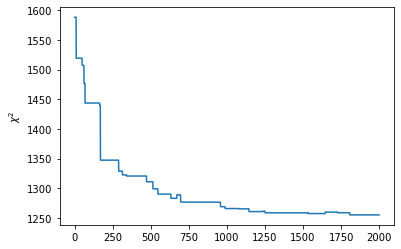

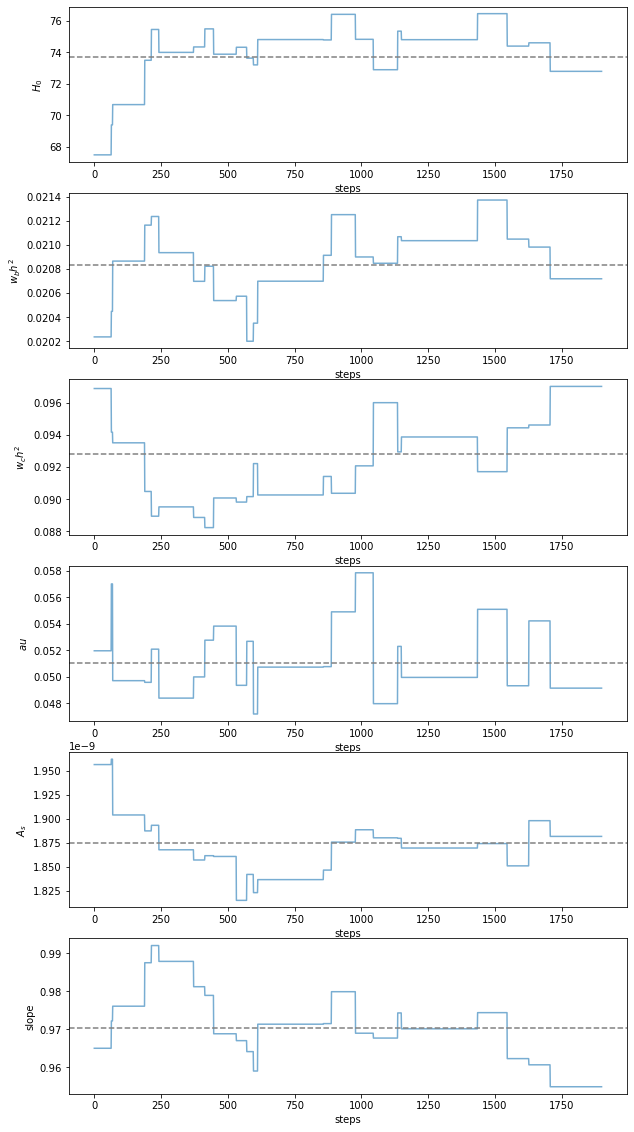

In [85]:
pars_new=np.mean(chain1[20:,:], axis=0)
std_new=np.std(chain1[20:,:], axis=0)
# print("Resulting values: ", pars_new, "with std", std_new )

printVals(chain1)

paths = np.transpose(chain1)

plt.plot(chi1[0:])

plt.ylabel("$\chi^2$")
plt.show()

variables = ['$H_0$', '$w_bh^2$', '$w_ch^2$', '$\tau$', '$A_s$', 'slope']

fig, ax = plt.subplots(6, 1, figsize=(10,20))
axs = ax.flatten()

for i, vchain in enumerate(paths):
    axs[i].plot(vchain[100:], alpha=0.6)
#     axs[i].set_title(variables[i])
    axs[i].axhline(pars_new[i], color='grey', ls="--", label="std")
    axs[i].set_xlabel('steps')
    axs[i].set_ylabel(variables[i])

plt.show()

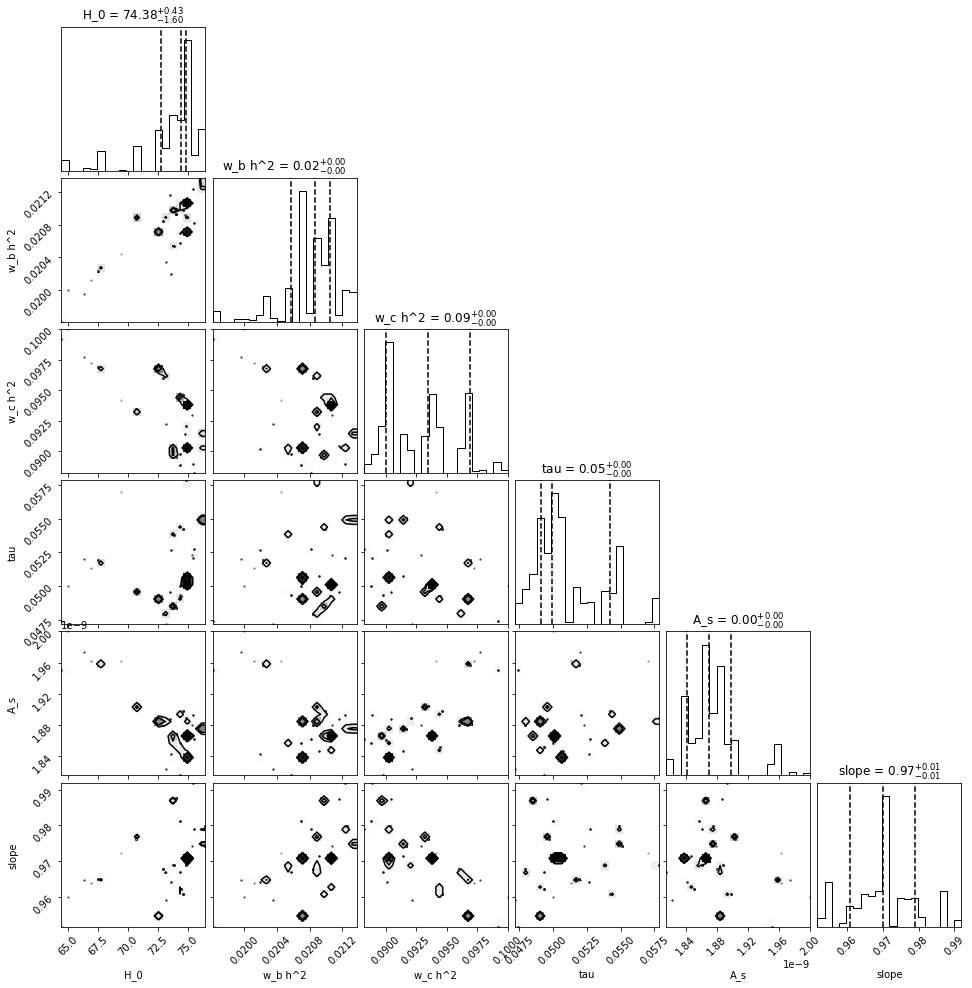

In [86]:
figure = corner.corner(chain1, labels=variable_names, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12})

*Please also present an argument as to why you think your chains are converged*

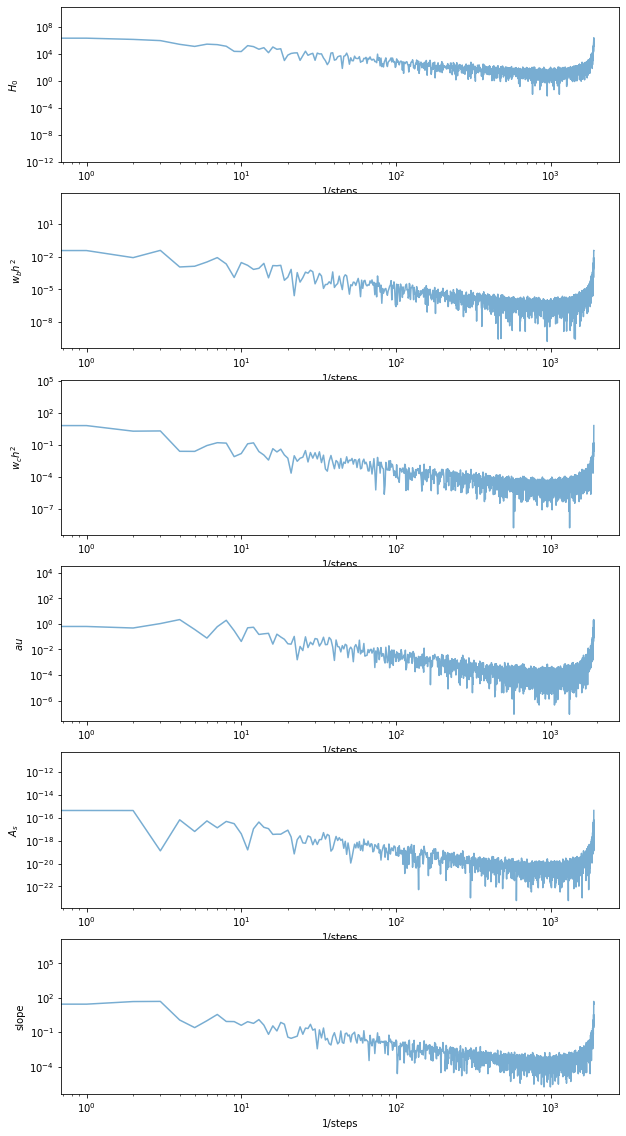

In [87]:
fig, ax = plt.subplots(6, 1, figsize=(10,20))
axs = ax.flatten()
k = np.linspace(0, 1, 4900)

for i, vchain in enumerate(paths):
    
    ft = np.fft.fft(vchain[100:])
    freq = np.fft.fftfreq(4900)
    
    axs[i].loglog(np.abs(ft)**2, alpha=0.6, )
#     axs[i].set_title(variables[i])
#     axs[i].axhline(pars_new[i], color='grey', ls="--", label="std")  
    axs[i].set_xlabel('1/steps')
    axs[i].set_ylabel(variables[i])
    
ax[0].set_ylim(1e-12,)

plt.show()

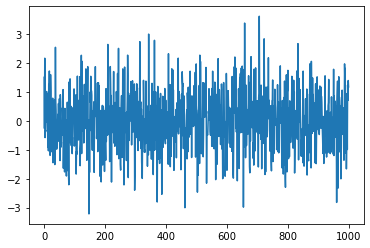

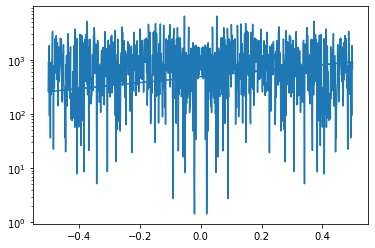

In [63]:
mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)

k = np.linspace(0, 1, num_samples)
freq = np.fft.fftfreq(1000)
# print(freq)

plt.plot(samples)
plt.show()

plt.semilogy(freq, np.abs(np.fft.fft(samples))**2)
plt.show()

### 5) 
The Planck satellite has independently measured the CMB sky, and finds
that the optical depth is 0.0544 ± 0.0073. Run a chain where you add this in as a prior on the value of τ. What are your new parameter values/constraints?    
You can also take your chain from part 4) and importance sample it (weighting by the prior) with the Planck τ prior. How to those results compare to the full chain results?   
(p316 in tb)

*For the importance sampling, the new likelihood on tau is just taking the error on the Planck value as gaussian. We'll take the measurement as uncorrelated to the CMB intensity spectrum (which is mostly true, because tau is derived using polarisation data). So, taking the Planck Gaussian likelihood for tau, the new likelihood is the old likelihood times the Gaussian likelihood. So importance sampling can be done weighting the chain by the Planck Gaussian likelihood prior.*   

newlike = oldlike * Gaussian likelihood   
Gaussian likelihood ?

In [80]:
# 0.0544 ± 0.0073

SyntaxError: invalid character in identifier (<ipython-input-80-22e04494cd58>, line 1)